In [1]:
# Ryan Loizzo and Nick Rocco
# Homework 5

import numpy as np
import matplotlib.pyplot as plt
import math

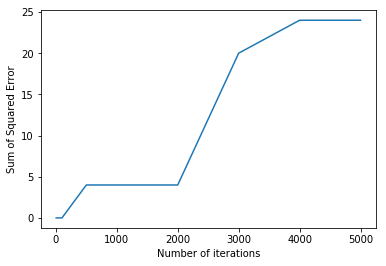

In [2]:
# Question 1

def target(x):
    val = -1 + float(x[1]) + float(x[2])
    if val > 0:
        return 1
    else:
        return -1

def direction(x):
    if x > 0:
        return 1
    else:
        return -1

def gradient_descent(data, learning_rate, ec):
    count = 0
    iter_error = []
    sse = 0
    error = 0
    weight_vector = [0.01, 0.01, 0.01]
    delta_w = 0
    for entry in data:
        t = target(entry)
        o = direction(np.dot(entry, weight_vector))
        count += 1
        if ec:
            learning_rate = learning_rate/count
        delta_w += learning_rate * (t-o) * entry
        weight_vector += delta_w
        error += (t-o)*(t-o)
        if count == 5:
            iter_error.append([count, error])
        elif count == 10:
            iter_error.append([count, error])
        elif count == 20:
            iter_error.append([count, error])
        elif count == 50:
            iter_error.append([count, error])
        elif count == 100:
            iter_error.append([count, error])
        elif count == 500:
            iter_error.append([count, error])
        elif count == 1000:
            iter_error.append([count, error])
        elif count == 2000:
            iter_error.append([count, error])
        elif count == 3000:
            iter_error.append([count, error])
        elif count == 4000:
            iter_error.append([count, error])
        elif count == 5000:
            iter_error.append([count, error])
    
    return iter_error

if __name__ == '__main__':
    x_min_range = -1000
    x_max_range = 1000
    N = 5000
    m = 2
    data = np.random.uniform(x_min_range,x_max_range,size=[N,m])
    data = np.concatenate((np.ones([N,1]),data),axis=1)

    iter_error = gradient_descent(data, 0.01, True)

    plt.plot([x[0] for x in iter_error], [y[1] for y in iter_error])
    plt.xlabel('Number of iterations')
    plt.ylabel('Sum of Squared Error')
    plt.show()


In [3]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix

In [4]:
# read in data
data = pd.read_csv("ism.csv")
data = data.as_matrix()

X = data[:,:6]
y = data[:,6]

# fit neural network classifier
mlp = MLPClassifier(solver="sgd")

# fit decision tree classifier
dt = DecisionTreeClassifier(criterion="gini")

# create 10 stratified samples
skf = StratifiedKFold(n_splits=10)

mlp_errors = []
mlp_Fs = []
dt_errors = []
dt_Fs = []

for train_index, test_index in skf.split(X,y):
	X_train, X_test = X[train_index], X[test_index]
	y_train, y_test = y[train_index], y[test_index]
        # train classifiers using training data
	mlp.fit(X_train, y_train)
	dt.fit(X_train, y_train)
	mlp_pred = mlp.predict(X_test)
	dt_pred = dt.predict(X_test)
	
	n_count = 0
	p_count = 0
	for i in mlp_pred:
		if i == 1:
			n_count += 1
		else:
			p_count += 1

	# get confusion matrix = [tn, fp, fn, tp]
	mlp_cf = confusion_matrix(y_test, mlp_pred).ravel() 
	dt_cf = confusion_matrix(y_test, dt_pred).ravel()

	M = {"tn": float(mlp_cf[0]), "fp": float(mlp_cf[1]), "fn": float(mlp_cf[2]), "tp": float(mlp_cf[3])}
	D = {"tn": float(dt_cf[0]), "fp": float(dt_cf[1]), "fn": float(dt_cf[2]), "tp": float(dt_cf[3])}
	
	# store error results in corresponding arrays
	mlp_errors.append((M["fp"] + M["fn"]) / float(sum(mlp_cf)))
	dt_errors.append((D["fp"] + D["fn"]) / float(sum(dt_cf)))

	# calculate precision, recall, and beta for F-measure
	try:
		mlp_precision = M["tp"] / (M["tp"] + M["fp"])
	except ZeroDivisionError:
		mlp_precision = 0.0
	mlp_recall = M["tp"] / (M["tp"] + M["fn"])
	mlp_beta = M["fn"] / (M["fn"] + M["tp"])	
	
	dt_precision = D["tp"] / (D["tp"] + D["fp"])
	dt_recall = D["tp"] / (D["tp"] + D["fn"])
	dt_beta = D["fn"] / (D["fn"] + D["tp"])

	
	# calculate and store F-measures
	try:
		mlp_F = (pow(1 + mlp_beta,2) * mlp_precision * mlp_recall) / (pow(mlp_beta,2) * (mlp_precision + mlp_recall))
		mlp_Fs.append(mlp_F)
	except ZeroDivisionError:
		mlp_Fs.append(0.0)
	dt_F = (pow(1 + dt_beta,2) * dt_precision * dt_recall) / (pow(dt_beta,2) * (dt_precision + dt_recall))
	dt_Fs.append(dt_F)

# print error results
print "MLP Error Scores:"
for e in mlp_errors:
	print "%0.3f" % e

print ""
print "Mean = %0.3f" % float(float(sum(mlp_errors)) / float(len(mlp_errors)))
print ""

print "Decision Tree Error Scores:"
for e in dt_errors:
	print "%0.3f" % e
print ""
print "Mean = %0.3f" % float(float(sum(dt_errors)) / float(len(dt_errors)))
print ""

# perform significance test with error as metric
T = 1.83
ED = [] # ED = Error Differences
for i in range(10):
	ED.append(mlp_errors[i] - dt_errors[i])
ED_mean = float(sum(ED)) / float(len(ED))
ED = map(lambda x: x - ED_mean, ED)
ED = map(lambda x: pow(x,2), ED)
S = float(pow(sum(ED) / 90., .5))
T_prime = ED_mean / S

print "For a 95% confidence interval, we use t = 1.83"
print "Using error as our metric, we get t' = %0.2f" % T_prime
print ""

# print F-measure results
print "MLP F-measures"
for F in mlp_Fs:
	print "%0.3f" % F
print ""
print "Mean = %0.3f" % float(float(sum(mlp_Fs)) / float(len(mlp_Fs)))
print ""

print "Decision Tree F-measures"
for F in dt_Fs:
	print "%0.3f" % F
print ""
print "Mean = %0.3f" % float(float(sum(dt_Fs)) / float(len(dt_Fs)))
print ""

# perform significance test with F-measure as metric
T = 1.83

FD = [] # F-measure differences
for i in range(10):
	FD.append(mlp_Fs[i] - dt_Fs[i])
FD_mean = float(sum(FD)) / float(len(FD))
FD = map(lambda x: x - FD_mean, FD)
FD = map(lambda x: pow(x,2), FD)
S = float(pow(sum(FD) / 90., .5))
T_prime = FD_mean / S

print "For a 95% confidence interval, we use t = 1.83"
print "Using F-measure as our metric, we get t' = %0.2f" % T_prime


MLP Error Scores:
0.023
0.023
0.020
0.020
0.027
0.021
0.026
0.020
0.023
0.023

Mean = 0.023

Decision Tree Error Scores:
0.021
0.020
0.025
0.014
0.020
0.015
0.019
0.013
0.022
0.018

Mean = 0.019

For a 95% confidence interval, we use t = 1.83
Using error as our metric, we get t' = 3.25

MLP F-measures
0.000
0.000
0.635
2.438
0.756
0.595
1.611
1.440
0.000
2.250

Mean = 0.972

Decision Tree F-measures
2.084
2.438
3.456
7.820
2.808
4.232
3.328
5.356
5.330
3.394

Mean = 4.025

For a 95% confidence interval, we use t = 1.83
Using F-measure as our metric, we get t' = -6.56
